# 递归

## 尾递归

有趣的是，如果函数在返回前的最后一步才进行递归调用，则该函数可以被编译器或解释器优化，使其在空间效率上与迭代相当。这种情况被称为尾递归（tail recursion）。

-   普通递归：当函数返回到上一层级的函数后，需要继续执行代码，因此系统需要保存上一层调用的上下文。
-   尾递归：递归调用是函数返回前的最后一个操作，这意味着函数返回到上一层级后，无须继续执行其他操作，因此系统无须保存上一层函数的上下文。

以计算 为例，我们可以将结果变量 res 设为函数参数，从而实现尾递归：


In [1]:
def tail_recur(n, res):
    """尾递归"""
    # 终止条件
    if n == 0:
        return res
    # 尾递归调用
    return tail_recur(n - 1, n + res)


print(tail_recur(5, 0))

15


## 递归树

当处理与“分治”相关的算法问题时，递归往往比迭代的思路更加直观、代码更加易读。以“斐波那契数列”为例。

按照递推关系进行递归调用，将前两个数字作为终止条件，便可写出递归代码。调用 fib(n) 即可得到斐波那契数列的第
个数字：

观察以下代码，我们在函数内递归调用了两个函数，这意味着从一个调用产生了两个调用分支。如图 2-6 所示，这样不断递归调用下去，最终将产生一棵层数为
的递归树（recursion tree）。
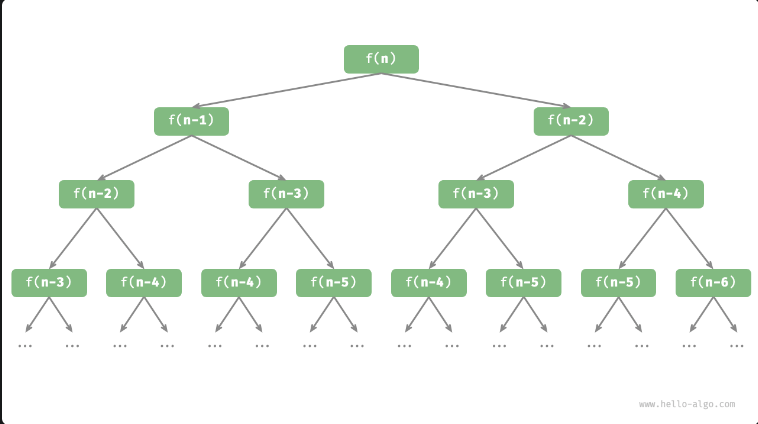


In [2]:
def fib(n):
    """递归计算斐波那契数列"""
    # 终止条件 f(1) = 0, f(2) = 1
    if n == 0 or n == 1:
        return 1
    # 递归调用 f(n) = f(n-1) + f(n-2)
    # # 返回结果 f(n)
    return fib(n - 1) + fib(n - 2)


fib(10)

89

从本质上看，递归体现了“将问题分解为更小子问题”的思维范式，这种分治策略至关重要。

从算法角度看，搜索、排序、回溯、分治、动态规划等许多重要算法策略直接或间接地应用了这种思维方式。
从数据结构角度看，递归天然适合处理链表、树和图的相关问题，因为它们非常适合用分治思想进行分析。

事实上，“调用栈”和“栈帧空间”这类递归术语已经暗示了递归与栈之间的密切关系。

递：当函数被调用时，系统会在“调用栈”上为该函数分配新的栈帧，用于存储函数的局部变量、参数、返回地址等数据。
归：当函数完成执行并返回时，对应的栈帧会被从“调用栈”上移除，恢复之前函数的执行环境。
因此，我们可以使用一个显式的栈来模拟调用栈的行为，从而将递归转化为迭代形式：


In [3]:
def for_loop_recur(n: int) -> int:
    """使用迭代模拟递归"""
    # 使用一个显式的栈来模拟系统调用栈
    stack = []
    res = 0
    # 递：递归调用
    for i in range(n, 0, -1):
        # 通过“入栈操作”模拟“递”
        stack.append(i)
    # 归：返回结果
    while stack:
        # 通过“出栈操作”模拟“归”
        res += stack.pop()
    # res = 1+2+3+...+n
    return res


if __name__ == "__main__":
    n = 5
    res = for_loop_recur(n)
    print(f"\n使用迭代模拟递归求和结果 res = {res}")


使用迭代模拟递归求和结果 res = 15
